## TF reporter activity analysis


### Figure 3, 4 & 5 - Reviewing TF specificity by characterizing reporter activities across cell types and upoun TF perturbations

---
Load libraries

In [7]:
# Load libraries:
import matplotlib.pyplot as plt  # Equivalent to RColorBrewer and ggplot2
import pandas as pd  # Equivalent to dplyr, tibble, and readr
pd.set_option('display.max_columns', None)  # Show all columns
import seaborn as sns  # Equivalent to pheatmap and ggpubr
import plotly  # Equivalent to plotly
import numpy as np  # Equivalent to maditr
import string  # Equivalent to stringr
import re  # Equivalent to stringr
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['pdf.use14corefonts'] = True # Edit text in Adobe Illustrator

NameError: name 'logging' is not defined

---
**Load data**

In [5]:
# Import RNA-seq correlation data
rna_correlations_df = pd.read_csv('/DATA/usr/m.trauernicht/projects/SuRE-TF/data/rna_correlations_df.tsv', sep='\t')
cDNA_df3 = pd.read_csv('/DATA/usr/m.trauernicht/projects/SuRE-TF/data/rna_correlations_df_all.tsv', sep='\t')

# Import perturbation fold-changes of reporters
on_target_activities = pd.read_csv("/DATA/usr/m.trauernicht/projects/SuRE-TF/data/on_target_activities.tsv", sep='\t')
off_target_activities = pd.read_csv("/DATA/usr/m.trauernicht/projects/SuRE-TF/data/off_target_activities.tsv", sep='\t')

# Import confidence levels
cDNA_df_confidence2 = pd.read_csv("/DATA/usr/m.trauernicht/projects/SuRE-TF/data/cDNA_df_confidence2.tsv", sep='\t')

# Import cDNA_df
cDNA_df = pd.read_csv("/DATA/usr/m.trauernicht/projects/SuRE-TF/data/gcf7124_stimulations/results/mt20240124_reporter_activity_filt_combined.csv")

# We are not going to use NIH3T3 data, so remove it for now
cDNA_df = cDNA_df[cDNA_df['cell'] != "NIH3T3"]

# Rename stimulation status of control conditions
cDNA_df['stimulation'].fillna("no", inplace=True)

---
### Plot correlations of reporter activity with TF abundance
Aim: How cell type-specific are the TF reporters?

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

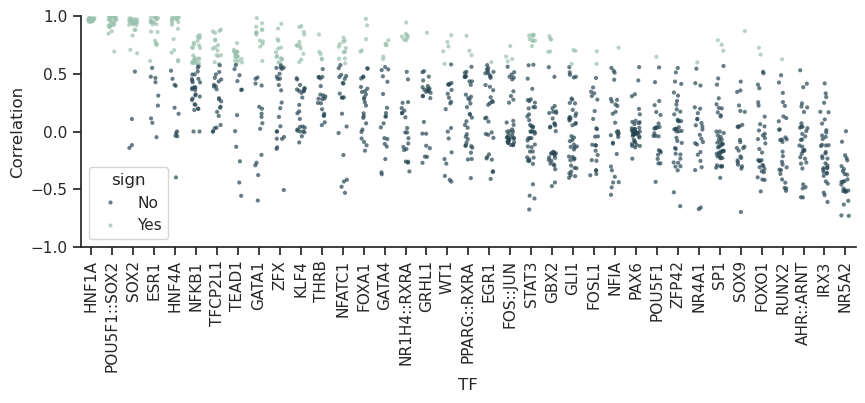

In [6]:
# Filter the dataframe
filtered_df = rna_correlations_df[rna_correlations_df['reasonable'] == 'Yes']
filtered_df = filtered_df[['reporter_id', 'cor_pval', 'cor', 'tf', 'commercial_reporter']].drop_duplicates()

# Add a new column 'sign'
filtered_df['sign'] = ['Yes' if pval > 1 else 'No' for pval in filtered_df['cor_pval']]

# Calculate mean correlation per TF
filtered_df['mean_cor'] = filtered_df.groupby('tf')['cor'].transform('mean')

# Plot the data, combine stripplot and violinplot
plt.figure(figsize=(10, 3))
## Remove grid
sns.set(style='ticks')
## Create stripplot, color matches p-value
sns.stripplot(x='tf', y='cor', data=filtered_df, order=filtered_df.groupby('tf')['mean_cor'].mean().sort_values(ascending=False).index, hue = 'sign', size=3, jitter=0.2, palette=['#264653', '#9AC1AE'], alpha=0.7)
plt.ylim(-1, 1)
plt.xticks(rotation=90)
sns.despine()
## Set axis labels
plt.xlabel('TF')
plt.ylabel('Correlation')
## Save figure to pdf
plt.savefig('/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/rna_correlations_stripplot.pdf', bbox_inches='tight')
plt.show();

Conclusion: For some TFs, the correlations are exceptional. Very interesting: For some TFs, only a fraction of reporters has a good correlation.

In [20]:
import shap

# Plot the data, combine stripplot and violinplot
plt.figure(figsize=(10, 3))
## Remove grid
sns.set(style='ticks')
## Create stripplot, color matches p-value
shap.plots.beeswarm(x='tf', y='cor', data=filtered_df, order=filtered_df.groupby('tf')['mean_cor'].mean().sort_values(ascending=False).index, hue = 'sign', palette=['#264653', '#9AC1AE'], alpha=0.7, dodge=False, inner="stick", scale="count")
plt.ylim(-1, 1)
plt.xticks(rotation=90)
sns.despine()
## Set axis labels
plt.xlabel('TF')
plt.ylabel('Correlation')
## Save figure to pdf
plt.savefig('/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/rna_correlations_stripplot.pdf', bbox_inches='tight')
plt.show();

TypeError: beeswarm() got an unexpected keyword argument 'x'

<Figure size 1000x300 with 0 Axes>

---
### TF abundance correlation: SP1 reporters

NameError: name 'add_reg_line' is not defined

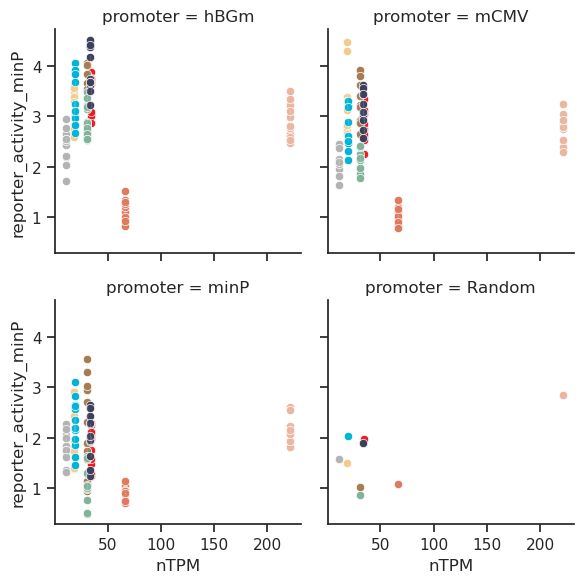

In [10]:
# Filter the dataframe
filtered_df = cDNA_df3[(cDNA_df3['tf'] == "SP1") & (cDNA_df3['commercial_reporter'] == "No")]
filtered_df = filtered_df[['cell', 'reporter_id', 'reporter_activity_minP', 'nTPM', 'promoter', 'cor_pval']].drop_duplicates()

cell_colors = {
    "A549": "#f2cc8f",
    "HCT116": "#ED1C24",
    "HEK293": "#00B4D8",
    "HepG2": "#B3B3B3",
    "K562": "#A67C52",
    "MCF7": "#81B29A",
    "U2OS": "#3D405B",
    "mES": "#EAB69F",
    "NPC": "#E07A5F"
}

# Create a FacetGrid
g = sns.FacetGrid(data=filtered_df, col='promoter', col_wrap=2, hue='cell', palette=cell_colors)

# Map sns.scatterplot to the FacetGrid
g.map(sns.scatterplot, 'nTPM', 'reporter_activity_minP')

g.map(sns.regplot, 'nTPM', 'reporter_activity_minP', color='black', scatter=False)

# Map add_reg_line to the FacetGrid
g.map_dataframe(add_reg_line)

## Add title and axis labels
g.set_axis_labels("nTPM", "Reporter activity (log2)")

# Set the titles to only show the variable value
g.set_titles("{col_name}")

## Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/SP1_TPM_correlation.pdf")
plt.show();

Conclusion: SP1 reporters with a random core promoter display activities that correlate with TF abundance

---
### Example: TF abundance correlation of two GATA4 reporters

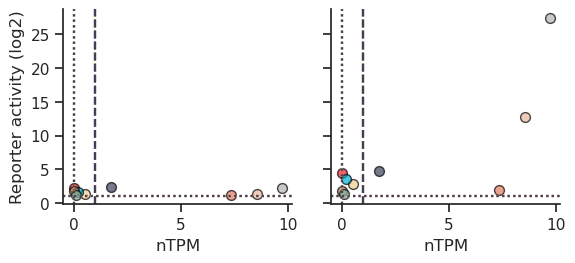

In [20]:
# Filter the dataframe
filtered_df = cDNA_df3[cDNA_df3['reporter_id'].isin(["GATA4_10bp_10bp_minP_3", "GATA4_10bp_10bp_minP_1"])]
filtered_df = filtered_df[['cell', 'reporter_id', 'reporter_activity_minP', 'nTPM']].drop_duplicates()
# Transform the 'reporter_activity_minP' column
filtered_df['reporter_activity_minP'] = 2**filtered_df['reporter_activity_minP']

# Create the plot
sns.set(style='ticks')
g = sns.FacetGrid(filtered_df, col='reporter_id', hue='cell', palette=cell_colors, col_wrap=2, height=3, aspect=1)
g.map(plt.scatter, 'nTPM', 'reporter_activity_minP', s=50, edgecolor='black', alpha=0.7)
g.map(plt.axvline, x=1, linestyle='dashed')
g.map(plt.axvline, x=0, linestyle='dotted')
g.map(plt.axhline, y=1, linestyle='dotted')
g.set_titles("")
g.set_axis_labels("nTPM", "Reporter activity (log2)")
## Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/TFCP2L1_TPM_correlation.pdf")
plt.show();

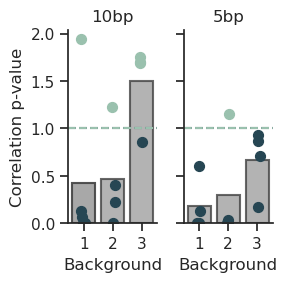

In [18]:
gata4_plot = rna_correlations_df[rna_correlations_df['tf'] == "GATA4"].drop_duplicates(subset=['reporter_id', 'cor_pval', 'spacing', 'background'])
gata4_plot['mean_cor_pval'] = gata4_plot.groupby(['spacing', 'background'])['cor_pval'].transform('mean')

colors_diverse = ["#264653", "#9AC1AE", "#5D987B", "#f2cc8f", "#e76f51"]

# Add a new column 'sign'
gata4_plot['sign'] = ['Yes' if pval > 1 else 'No' for pval in gata4_plot['cor_pval']]

# Create a FacetGrid object
g = sns.FacetGrid(gata4_plot, col='spacing', hue = 'sign', col_wrap=2, height=3, aspect=.5, palette=['#264653', '#9AC1AE'])

# Map the plots to the FacetGrid
g.map(plt.axhline, y=1, linestyle='dashed')
g.map(plt.bar, 'background', 'mean_cor_pval', color='grey', edgecolor='black', linewidth=1.5, alpha=0.2)

# Add jitter to the scatter plot
jitter = 0.1  # Adjust this value based on your needs
gata4_plot['background_jitter'] = gata4_plot['background'] + np.random.uniform(-jitter, jitter, size=len(gata4_plot))
g.map(plt.scatter, 'background_jitter', 'cor_pval', s=50)

# Set properties for each subplot
g.set_titles("{col_name}")

# Set axis labels
g.set_axis_labels("Background", "Correlation p-value")

# Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/GATA4_correlation_pval.pdf")

plt.show();

Conclusion: Correlation depends on background sequence.

---
### Example: TF abundance correlation of two TFCP2L1 reporters

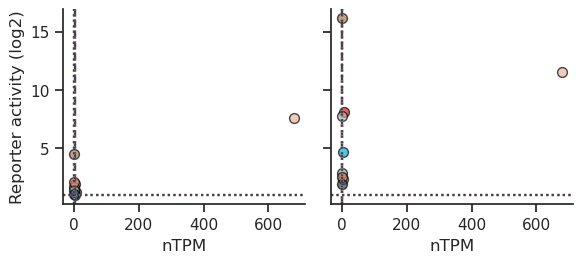

In [ ]:
# Filter the dataframe
filtered_df = cDNA_df3[cDNA_df3['reporter_id'].isin(["TFCP2L1_10bp_10bp_minP_1", "TFCP2L1_5bp_10bp_minP_1"])]
filtered_df = filtered_df[['cell', 'reporter_id', 'reporter_activity_minP', 'nTPM']].drop_duplicates()
# Transform the 'reporter_activity_minP' column
filtered_df['reporter_activity_minP'] = 2**filtered_df['reporter_activity_minP']

# Create the plot
sns.set(style='ticks')
g = sns.FacetGrid(filtered_df, col='reporter_id', hue='cell', palette=cell_colors, col_wrap=2, height=3, aspect=1)
g.map(plt.scatter, 'nTPM', 'reporter_activity_minP', s=50, edgecolor='black', alpha=0.7)
g.map(plt.axvline, x=1, linestyle='dashed')
g.map(plt.axvline, x=0, linestyle='dotted')
g.map(plt.axhline, y=1, linestyle='dotted')
g.set_titles("")
g.set_axis_labels("nTPM", "Reporter activity (log2)")
## Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/TFCP2L1_TPM_correlation.pdf")
plt.show();

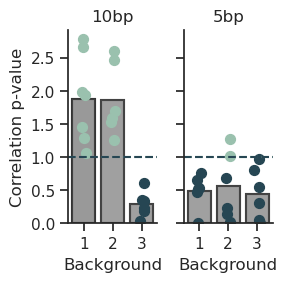

In [17]:
tfcp2l1_plot = rna_correlations_df[rna_correlations_df['tf'] == "TFCP2L1"].drop_duplicates(subset=['reporter_id', 'cor_pval', 'spacing', 'background'])
tfcp2l1_plot['mean_cor_pval'] = tfcp2l1_plot.groupby(['spacing', 'background'])['cor_pval'].transform('mean')

colors_diverse = ["#264653", "#9AC1AE", "#5D987B", "#f2cc8f", "#e76f51"]

# Add a new column 'sign'
tfcp2l1_plot['sign'] = ['Yes' if pval > 1 else 'No' for pval in tfcp2l1_plot['cor_pval']]

# Create a FacetGrid object
g = sns.FacetGrid(tfcp2l1_plot, col='spacing', hue = 'sign', col_wrap=2, height=3, aspect=0.5, palette=['#9AC1AE', '#264653'])

# Map the plots to the FacetGrid
g.map(plt.axhline, y=1, linestyle='dashed')
g.map(plt.bar, 'background', 'mean_cor_pval', color='grey', edgecolor='black', linewidth=1.5, alpha=0.2)

# Add jitter to the scatter plot
jitter = 0.1  # Adjust this value based on your needs
tfcp2l1_plot['background_jitter'] = tfcp2l1_plot['background'] + np.random.uniform(-jitter, jitter, size=len(tfcp2l1_plot))
g.map(plt.scatter, 'background_jitter', 'cor_pval', s=50)

# Set properties for each subplot
g.set_titles("{col_name}")

# Set axis labels
g.set_axis_labels("Background", "Correlation p-value")

# Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/TFCP2L1_correlation_pval.pdf")

plt.show();

Conclusion: Correlation depends on background sequence.

---
### Example: TF abundance correlation of two GATA1 reporters

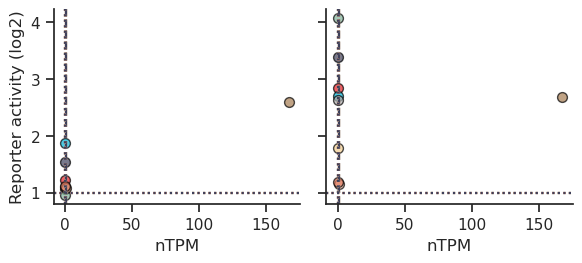

In [ ]:
# Filter the dataframe
filtered_df = cDNA_df3[cDNA_df3['reporter_id'].isin(["GATA1_5bp_10bp_minP_3", "GATA1_5bp_21bp_minP_3"])]
filtered_df = filtered_df[['cell', 'reporter_id', 'reporter_activity_minP', 'nTPM']].drop_duplicates()
# Transform the 'reporter_activity_minP' column
filtered_df['reporter_activity_minP'] = 2**filtered_df['reporter_activity_minP']

# Create the plot
sns.set(style='ticks')
g = sns.FacetGrid(filtered_df, col='reporter_id', hue='cell', palette=cell_colors, col_wrap=2, height=3, aspect=1)
g.map(plt.scatter, 'nTPM', 'reporter_activity_minP', s=50, edgecolor='black', alpha=0.7)
g.map(plt.axvline, x=1, linestyle='dashed')
g.map(plt.axvline, x=0, linestyle='dotted')
g.map(plt.axhline, y=1, linestyle='dotted')
g.set_titles("")
g.set_axis_labels("nTPM", "Reporter activity (log2)")
## Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/GATA1_TPM_correlation.pdf")
plt.show();

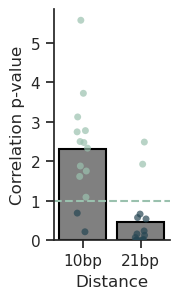

In [15]:
# Filter the dataframe
gata1_plot = rna_correlations_df[rna_correlations_df['tf'] == "GATA1"]
gata1_plot = gata1_plot[['reporter_id', 'cor_pval', 'distance']].drop_duplicates()
gata1_plot['mean_cor_pval'] = gata1_plot.groupby('distance')['cor_pval'].transform('mean')
gata1_plot['sign'] = ['Yes' if pval > 1 else 'No' for pval in gata1_plot['cor_pval']]
colors_diverse = ["#9AC1AE", "#264653"]

# Generate plot
plt.figure(figsize=(1.5, 3))
plt.axhline(y=1, linestyle='dashed', color = "#9AC1AE")
plt.bar(x=gata1_plot['distance'].unique(), height=gata1_plot.groupby('distance')['mean_cor_pval'].mean(), color='grey', edgecolor='black', linewidth=1.5)
sns.stripplot(data = gata1_plot, x=gata1_plot['distance'], y=gata1_plot['cor_pval'], jitter=0.1, hue = 'sign', palette=colors_diverse, size=5, alpha=0.7)
plt.legend().remove()
sns.despine()
## Set axis labels
plt.xlabel('Distance')
plt.ylabel('Correlation p-value')

# Save plot to pdf
g.savefig("/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/GATA1_correlation_pval.pdf")
plt.show();

Conclusion: Correlation depends on distance to core promoter. 

---
### Showcase how reporter activities change upon perturbation
Aim: Demonstrate perturbation responses and differences between reporter designs.

findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following familie

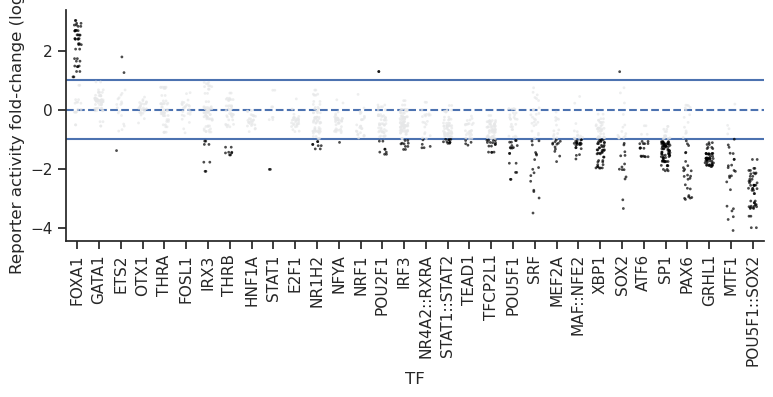

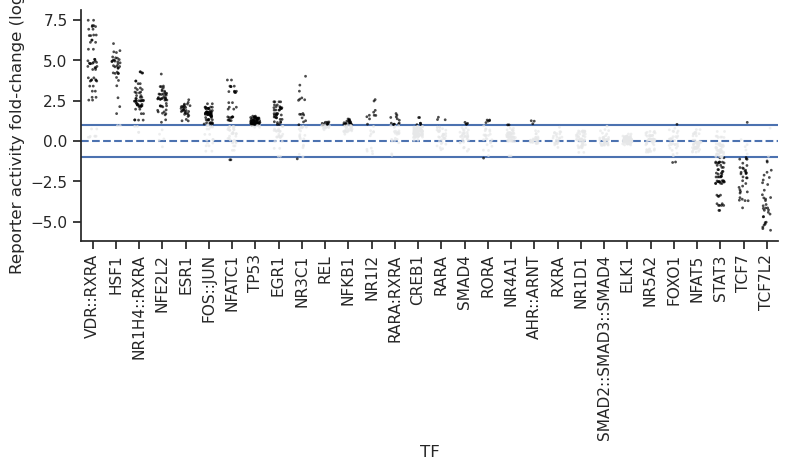

In [42]:
# Combine off_target_activities and on_target_activities dataframes
effect_sizes = pd.concat([off_target_activities[['condition', 'effect_size']].drop_duplicates(),
                          on_target_activities[['condition', 'effect_size']].drop_duplicates()])

# Replace NaN values with 0
effect_sizes['effect_size'] = effect_sizes['effect_size'].fillna(0)

# Rename columns
effect_sizes = effect_sizes.rename(columns={'condition': 'perturbation_condition'})

# Select columns
effect_sizes = effect_sizes[['perturbation_condition', 'effect_size']]

# Add kind of stimulation
stimulation_kind = cDNA_df[['condition', 'stimulation']].drop_duplicates().rename(columns={'condition': 'perturbation_condition'})

# Filter the dataframe
filtered_df = cDNA_df_confidence2[['tf', 'reporter_id', 'reporter_dif_minP', 'commercial_reporter', 'perturbation_condition']].drop_duplicates()

# Left join with effect_sizes dataframe
filtered_df = filtered_df.merge(effect_sizes, how='left', on='perturbation_condition')

# Left join with stimulation_kind dataframe
filtered_df = filtered_df.merge(stimulation_kind, how='left', on='perturbation_condition')

# Replace reporter_dif_minP values based on effect_size
filtered_df['reporter_dif_minP'] = np.where(filtered_df['effect_size'] == 0, -filtered_df['reporter_dif_minP'], filtered_df['reporter_dif_minP'])

# Calculate the number of reporters per tf
filtered_df['n_reporters'] = filtered_df.groupby('tf')['reporter_id'].transform('count')

# Filter out tf with less than 10 reporters
filtered_df = filtered_df[filtered_df['n_reporters'] > 10]

# Calculate the mean of reporter_dif_minP per tf
filtered_df['dif_mean'] = filtered_df.groupby('tf')['reporter_dif_minP'].transform('mean')

# Filter out tf with dif_mean equal to 0
filtered_df = filtered_df[filtered_df['dif_mean'] != 0]

# Remove TFs with only NA values in reporter_dif_minP
filtered_df = filtered_df.dropna(subset=['reporter_dif_minP'])

filtered_df['sign'] = np.where(abs(filtered_df['reporter_dif_minP']) > 1, 1, 0)

# Generate plot - only KD, overexpression, degron
## Get the order of 'tf' by the descending 'mean_tf_activity'
kd_df = filtered_df[filtered_df['stimulation'].isin(['KD', 'overexpression', 'degron'])]
order_kd = kd_df.sort_values('dif_mean', ascending=False)['tf'].unique()

# Create the plot
plt.figure(figsize=(9, 3))
sns.stripplot(data=kd_df, x='tf', y='reporter_dif_minP', hue='sign', palette={1: 'black', 0: '#E6E7E8'}, order=order_kd, size=2, jitter=0.2, alpha=0.7)
plt.axhline(y=0, linestyle='dashed')
plt.axhline(y=1, linestyle='solid')
plt.axhline(y=-1, linestyle='solid')
plt.xticks(rotation=90)
plt.xlabel('TF')
plt.ylabel('Reporter activity fold-change (log2)')
plt.legend().remove()
sns.despine()
## Save plot to pdf
plt.savefig('/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/perturbation_fold_changes_all_kd.pdf', bbox_inches='tight')
plt.show();

# Generate plot - only pathway stimulation
## Get the order of 'tf' by the descending 'mean_tf_activity'
pat_df = filtered_df[filtered_df['stimulation'].isin(['pathway'])]
order_pat = pat_df.sort_values('dif_mean', ascending=False)['tf'].unique()

# Create the plot
plt.figure(figsize=(9, 3))
sns.stripplot(data=pat_df, x='tf', y='reporter_dif_minP', hue='sign', palette={1: 'black', 0: '#E6E7E8'}, order=order_pat, size=2, jitter=0.2, alpha=0.7)
plt.axhline(y=0, linestyle='dashed')
plt.axhline(y=1, linestyle='solid')
plt.axhline(y=-1, linestyle='solid')
plt.xticks(rotation=90)
plt.xlabel('TF')
plt.ylabel('Reporter activity fold-change (log2)')
plt.legend().remove()
sns.despine()
## Save plot to pdf
plt.savefig('/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/perturbation_fold_changes_all_pathway.pdf', bbox_inches='tight')
plt.show();

In [32]:
stimulation_kind['stimulation'].unique()

array(['no', 'pathway', 'KD', 'overexpression', 'degron'], dtype=object)

---
**VDR**

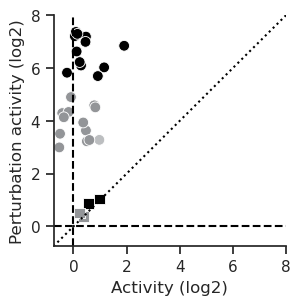

In [ ]:
# Filter the dataframe
filtered_df = cDNA_df[(cDNA_df['tf'].str.contains("VDR")) & 
                      (cDNA_df['condition'].isin(["U2OS", "U2OS_Calcitriol"])) & 
                      (cDNA_df['neg_ctrls'] == "No")]

# Select relevant columns and remove duplicates
filtered_df = filtered_df[['reporter_id', 'commercial_reporter', 'condition', 'reporter_activity_minP', 'promoter']].drop_duplicates()

# Spread the dataframe based on 'condition' column
spread_df = filtered_df.pivot(index=['reporter_id', 'commercial_reporter', 'promoter'], columns='condition', values='reporter_activity_minP')

# Create the plot
plt.figure(figsize=(3, 3))
sns.scatterplot(data=spread_df, x=np.log2(spread_df['U2OS']), y=np.log2(spread_df['U2OS_Calcitriol']), hue='promoter', style='commercial_reporter', palette=['black', '#939598', '#BCBEC0', '#E6E7E8'], markers=['o', 's', 'D', 'X'], s=60)
plt.axhline(y=0, linestyle='dashed', color = 'black')
plt.axvline(x=0, linestyle='dashed', color = 'black')
plt.plot([-0.75, 8], [-0.75, 8], linestyle='dotted', color = 'black')
plt.xlim(-0.75, 8)
plt.ylim(-0.75, 8)
plt.xlabel('Activity (log2)')
plt.ylabel('Perturbation activity (log2)')
plt.legend().remove()
sns.despine()
## Save plot to pdf
plt.savefig('/DATA/usr/m.trauernicht/projects/SuRE-TF/figures/Figure3_5/VDR_perturbation_activity.pdf', bbox_inches='tight')
plt.show();

---
**FOXA1**

In [6]:
# Filter the dataframe
filtered_df = cDNA_df[(cDNA_df['tf'].str.contains("FOXA1")) & 
                      (cDNA_df['condition'].isin(["mES_Dox", "mES_FOXA1-OE"])) & 
                      (cDNA_df['neg_ctrls'] == "No")]

# Select relevant columns and remove duplicates
filtered_df = filtered_df[['reporter_id', 'commercial_reporter', 'spacing', 'condition', 'reporter_activity_minP']].drop_duplicates()

# Spread the dataframe based on 'condition' column
spread_df = filtered_df.pivot(index=['reporter_id', 'commercial_reporter', 'spacing'], columns='condition', values='reporter_activity_minP')

# Create the plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=spread_df, x=spread_df['mES_Dox'].apply(lambda x: math.log2(x)), y=spread_df['mES_FOXA1-OE'].apply(lambda x: math.log2(x)), hue='spacing', style='commercial_reporter', palette=['#7C9EB2', '#BFD0D9'], markers=['o', 's'], s=60)
plt.axhline(y=0, linestyle='dashed')
plt.axvline(x=0, linestyle='dashed')
plt.plot([-1, 3], [-1, 3], linestyle='dotted')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel('Activity (log2)')
plt.ylabel('Perturbation activity (log2)')
plt.legend().remove()
plt.show()


<Figure size 600x600 with 0 Axes>

NameError: name 'math' is not defined

<Figure size 600x600 with 0 Axes>

---
**FOXA1**